In [2]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
im = imageio.imread("..\\..\\Imagenes\\iPhone.jpg")
img = im.astype(np.uint8)
print(im)

[[[140 177   2]
  [139 176   1]
  [137 174   0]
  ...
  [244 237 231]
  [245 238 232]
  [245 238 232]]

 [[138 174   2]
  [137 173   1]
  [136 172   0]
  ...
  [243 236 230]
  [243 236 230]
  [243 236 230]]

 [[137 172   7]
  [137 172   7]
  [136 171   6]
  ...
  [242 235 229]
  [241 234 228]
  [241 234 228]]

 ...

 [[222 226 235]
  [223 226 235]
  [223 226 235]
  ...
  [233 232 240]
  [233 232 238]
  [233 232 238]]

 [[222 226 235]
  [223 226 235]
  [223 226 235]
  ...
  [227 226 234]
  [227 226 231]
  [227 226 231]]

 [[221 225 234]
  [223 226 235]
  [223 226 235]
  ...
  [219 218 224]
  [219 218 223]
  [219 218 223]]]


In [5]:
print('Max original', end=' ')
print(np.amax(im))
print('Min original', end=' ')
print(np.amin(im))

Max original 255
Min original 0


In [6]:
im_original = im
im = im / 255

print('Max original', end=' ')
print(np.amax(im))
print('Min original', end=' ')
print(np.amin(im))

Max original 1.0
Min original 0.0


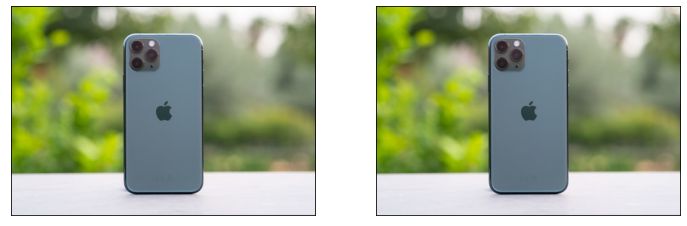

In [7]:
fix, ax = plt.subplots(1, 2, figsize=(12, 12),
                      subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(im_original, cmap='gray')
ax[1].imshow(im, cmap='gray')

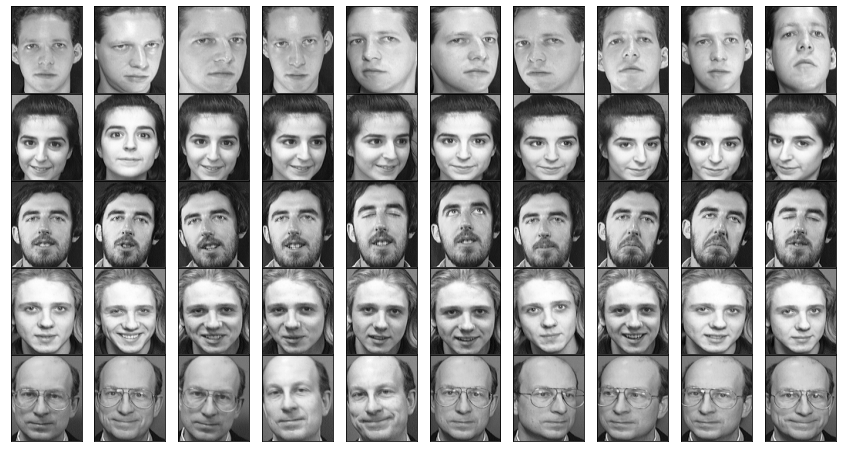

In [12]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob(".\\imagenes\\*\*.pgm"):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                      subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112, 92), cmap="gray")

In [13]:
from sklearn.decomposition import PCA

In [22]:
caras_pca = PCA(n_components = 0.999)
caras_pca.fit(caras)

PCA(n_components=0.999)

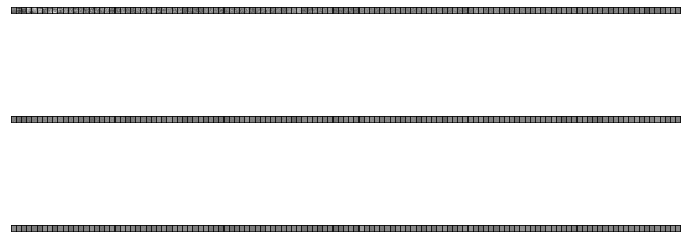

In [23]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                      subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112, 92), cmap="gray")

In [24]:
print(caras_pca.n_components_)

388


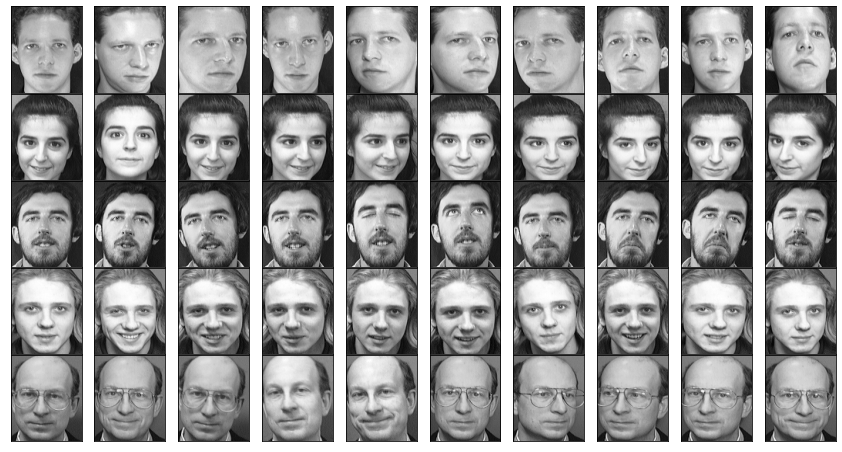

In [25]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                      subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112, 92), cmap="gray")

[ 6. -1.]
[[ 0.8        -0.70710678]
 [ 0.6         0.70710678]]
